In [221]:
%pip install kagglehub ucimlrepo scikit-learn pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [222]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dumanmesut/individual-carbon-footprint-calculation")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\dumanmesut\individual-carbon-footprint-calculation\versions\1


In [223]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ucimlrepo import fetch_ucirepo 

# Exploratory Data Analysis

In [224]:
csv_path = os.path.join(path, "Carbon Emission.csv") 
df = pd.read_csv(csv_path)

print(df.head())

    Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0  overweight  female  pescatarian            daily                  coal   
1       obese  female   vegetarian  less frequently           natural gas   
2  overweight    male     omnivore  more frequently                  wood   
3  overweight    male     omnivore      twice a day                  wood   
4       obese  female   vegetarian            daily                  coal   

      Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
0        public          NaN           often                   230   
1  walk/bicycle          NaN           often                   114   
2       private       petrol           never                   138   
3  walk/bicycle          NaN       sometimes                   157   
4       private       diesel           often                   266   

  Frequency of Traveling by Air  Vehicle Monthly Distance Km Waste Bag Size  \
0                    frequently      

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [226]:
df["Vehicle Type"] = df["Vehicle Type"].fillna("None")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(include="number").columns.tolist()

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
df_cat_ohe = encoder.fit_transform(df[cat_cols])
ohe_cols = encoder.get_feature_names_out(cat_cols)

df_ohe = pd.concat(
    [df[num_cols].reset_index(drop=True),
     pd.DataFrame(df_cat_ohe, columns=ohe_cols)],
    axis=1
)
df_ohe.index = df.index  
df_ohe.shape

(10000, 80)

In [228]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


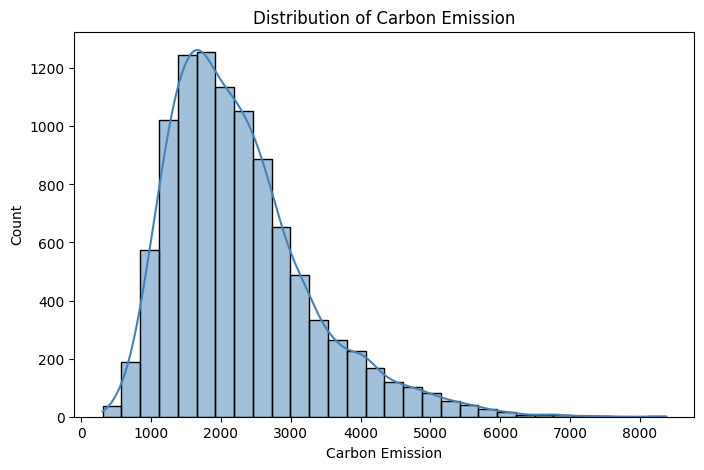

In [229]:
plt.figure(figsize=(8,5))
sns.histplot(df["CarbonEmission"], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Carbon Emission")
plt.xlabel("Carbon Emission")
plt.ylabel("Count")
plt.show()

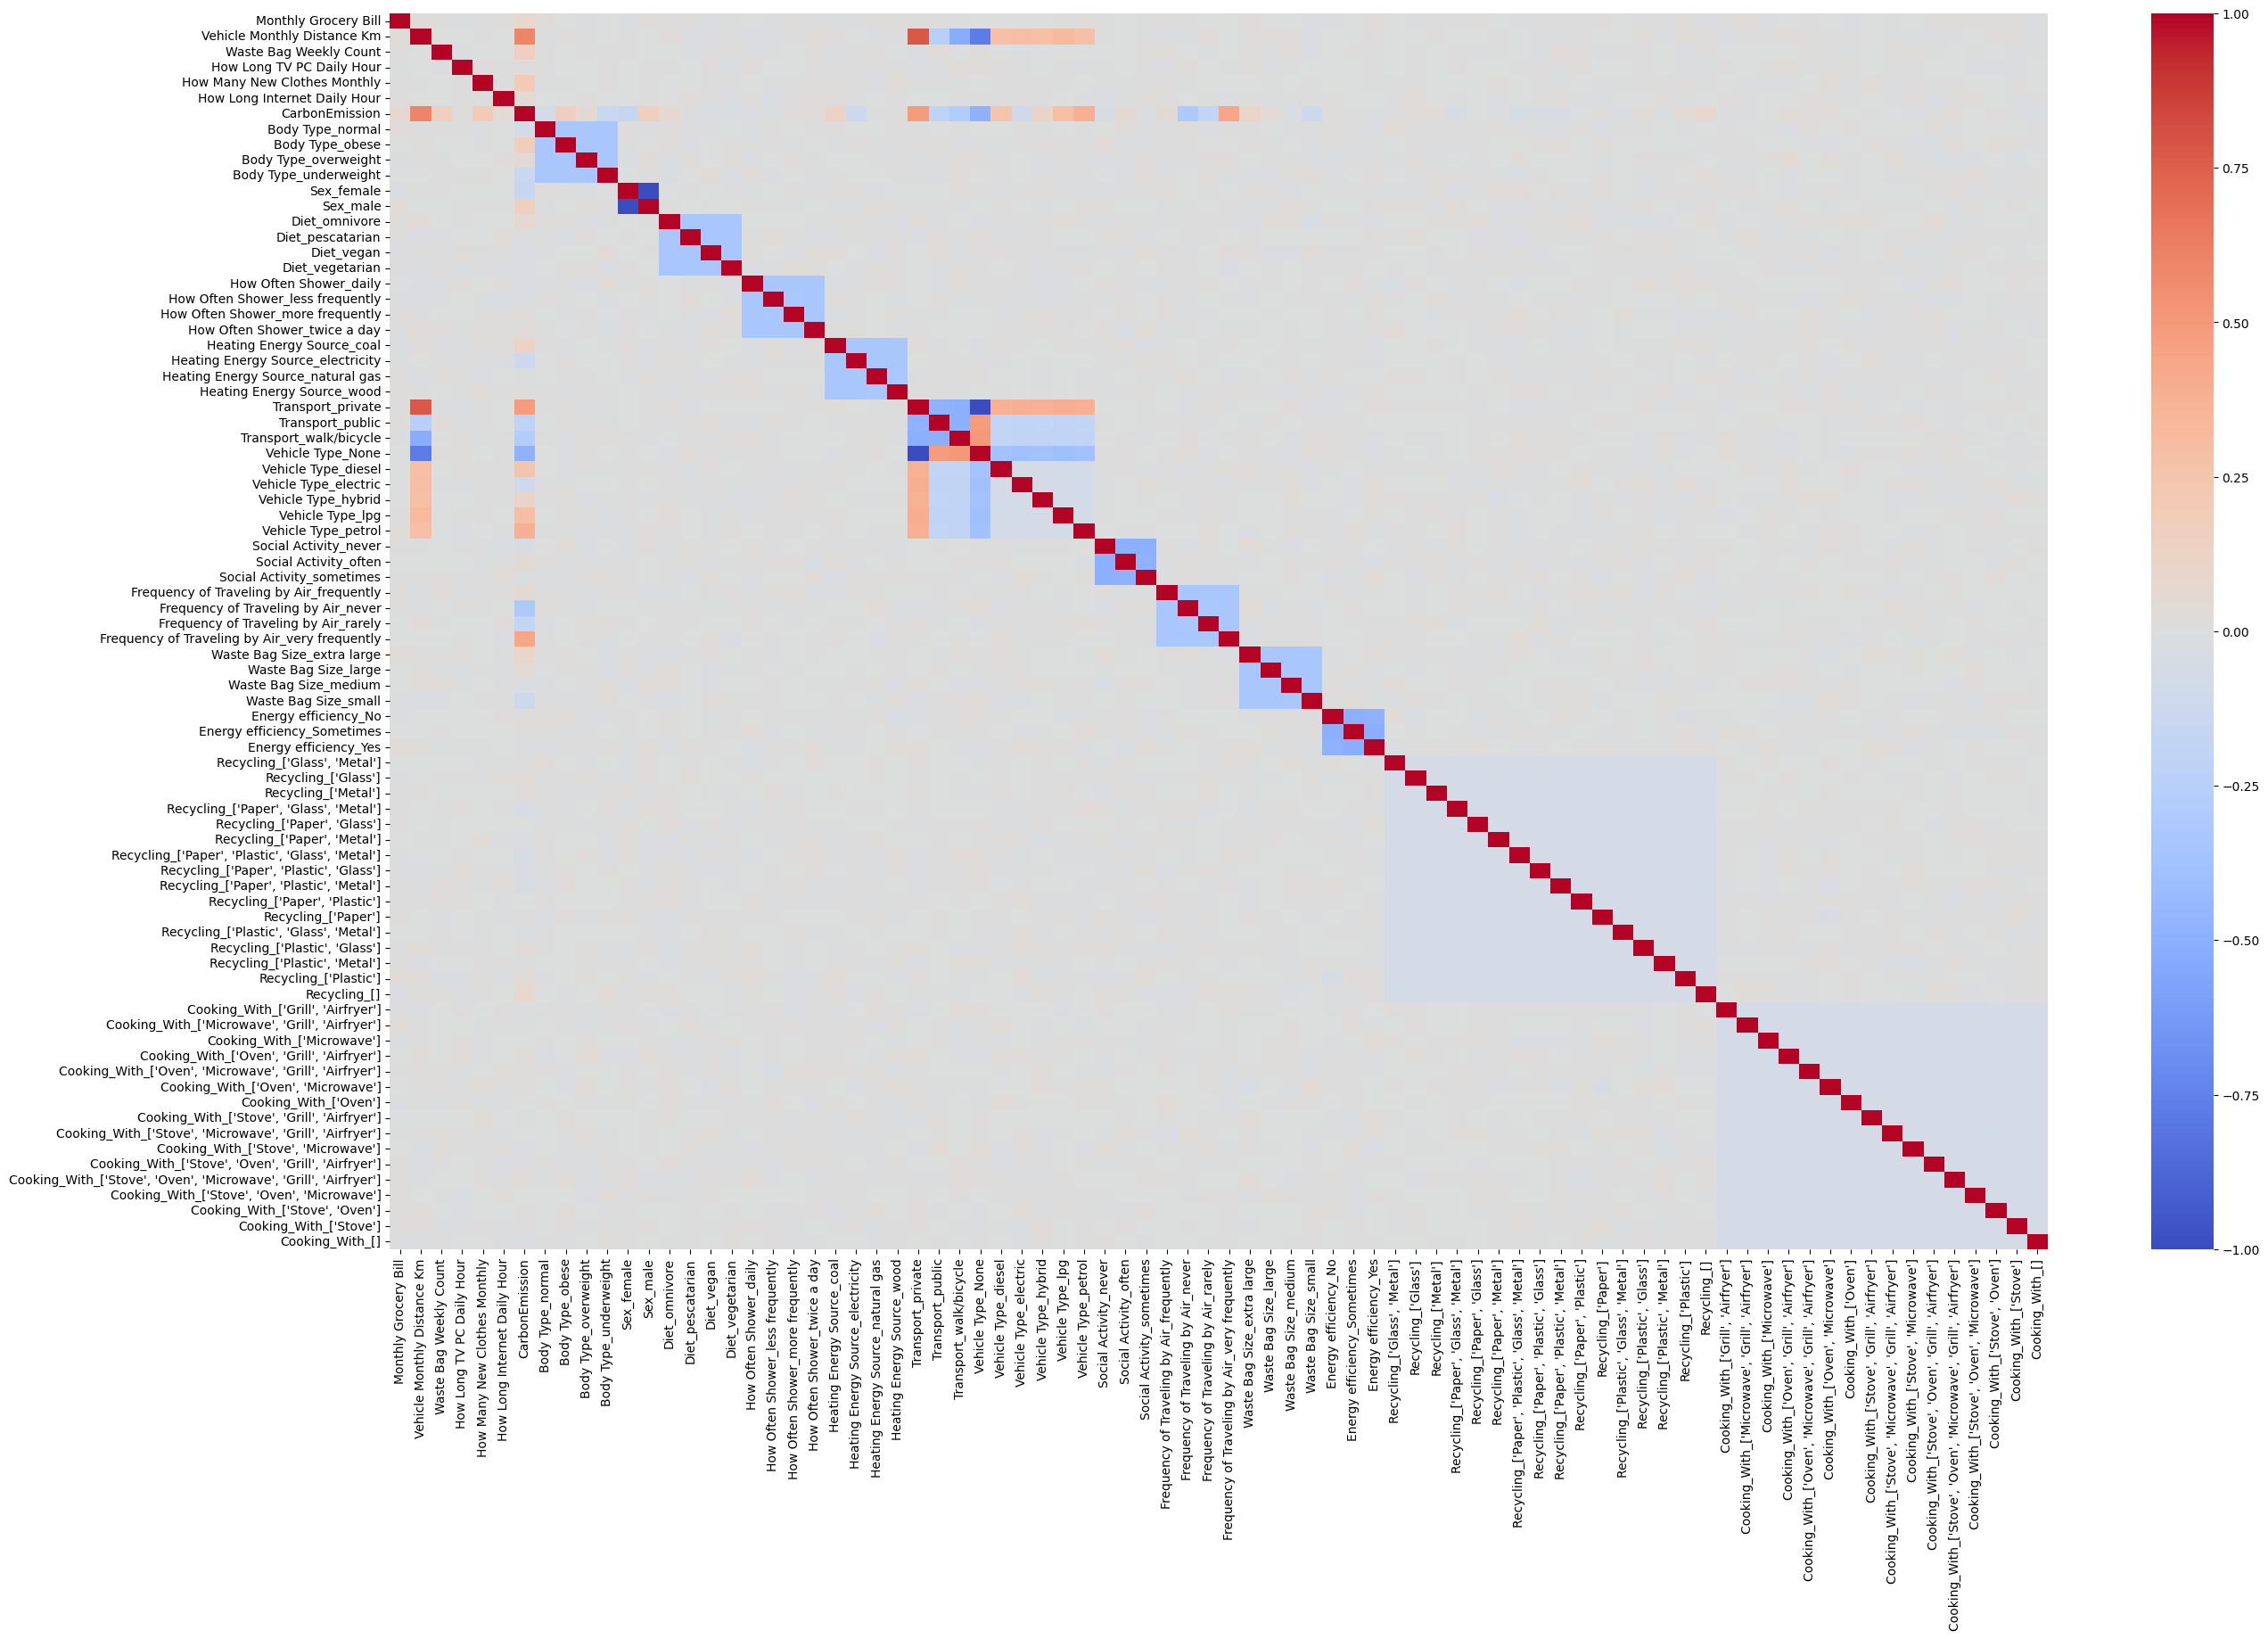

In [230]:
#correration matrix
df_corr = df_ohe.corr(numeric_only=True)
plt.figure(figsize=(30, 18))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')
plt.show()

We can see from the hotmap that the CarbonEmission is corrlerate with Vehicle Distance and other highly related variables such as Transport Type. 
AdditionLLY, Frequency of Traveling by Air has impact on CarbonEmission.

In [250]:
df_ohe = pd.get_dummies(df.drop(columns=["CarbonEmission"]), drop_first=True)

In [ ]:
X = pd.concat([
    df.select_dtypes(include="number").drop(columns=["CarbonEmission"]),
    df_ohe
], axis=1)

X.head()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,...,"Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[],Emission_Class_Medium,Emission_Class_High
0,230,210,4,7,26,1,230,210,4,7,...,False,False,False,False,False,True,False,False,True,False
1,114,9,3,9,38,5,114,9,3,9,...,False,True,False,False,False,False,False,False,True,False
2,138,2472,1,14,47,6,138,2472,1,14,...,False,False,False,False,False,False,False,False,False,True
3,157,74,3,20,5,7,157,74,3,20,...,False,False,False,False,False,False,False,False,False,False
4,266,8457,1,3,5,6,266,8457,1,3,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
y = df['CarbonEmission']

#splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Problem 3.2/3.3

# Linear Regression

In [253]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    for feature, coef in zip(X.columns, model.coef_):
      print(f"{feature}: {coef:.4f}")

    return model, y_pred

In [254]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 64489.56765270285
R2 Score: 0.9379734049071166


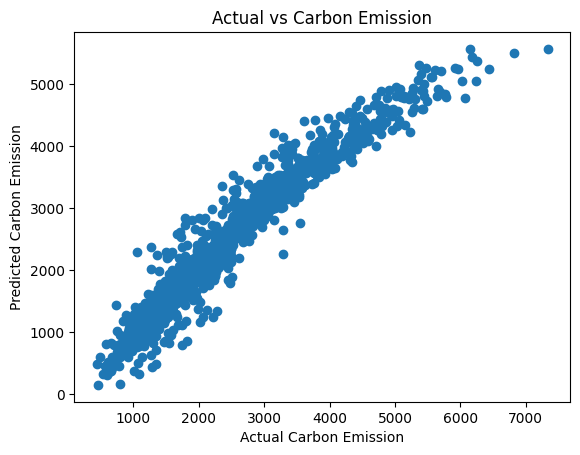

In [255]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Actual vs Carbon Emission")
plt.show()

In [236]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [256]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    for feature, coef in zip(X.columns, model.coef_):
      print(f"{feature}: {coef:.4f}")

    return model, y_pred

# Stretch

Compare 3 linear regression models

In [257]:
# Fit models
lr_model, lr_pred = evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test, "Linear Regression")
ridge_model, ridge_pred = evaluate_model(Ridge(alpha=1.0), X_train, X_test, y_train, y_test, "Ridge Regression")
lasso_model, lasso_pred = evaluate_model(Lasso(alpha=0.1), X_train, X_test, y_train, y_test, "Lasso Regression")


Linear Regression:
MSE: 64489.57
R2 Score: 0.94
Monthly Grocery Bill: 0.4014
Vehicle Monthly Distance Km: 0.0954
Waste Bag Weekly Count: 37.5589
How Long TV PC Daily Hour: 1.2900
How Many New Clothes Monthly: 6.2036
How Long Internet Daily Hour: 3.2215
Monthly Grocery Bill: 0.4014
Vehicle Monthly Distance Km: 0.0954
Waste Bag Weekly Count: 37.5589
How Long TV PC Daily Hour: 1.2900
How Many New Clothes Monthly: 6.2036
How Long Internet Daily Hour: 3.2215
Body Type_obese: 381.5968
Body Type_overweight: 185.6350
Body Type_underweight: -108.9278
Sex_male: 306.5972
Diet_pescatarian: -80.0088
Diet_vegan: -143.4997
Diet_vegetarian: -120.6415
How Often Shower_less frequently: -2.5413
How Often Shower_more frequently: 32.8763
How Often Shower_twice a day: 23.2657
Heating Energy Source_electricity: -390.0974
Heating Energy Source_natural gas: -183.3795
Heating Energy Source_wood: -186.6460
Transport_public: -120.1339
Transport_walk/bicycle: 2.2709
Vehicle Type_diesel: 193.1316
Vehicle Type_elec

<Figure size 1400x600 with 0 Axes>

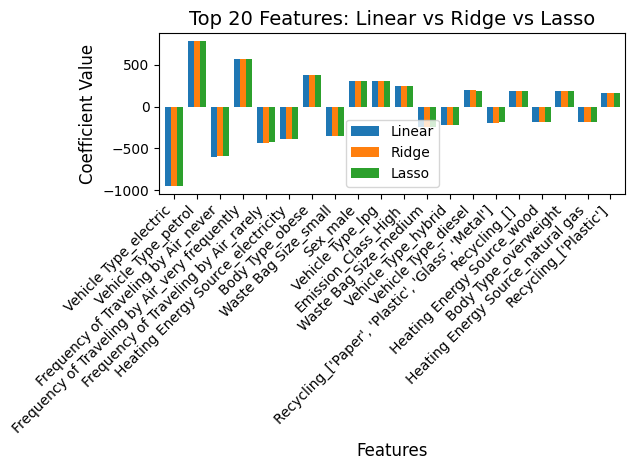

In [264]:
# Coefficient Comparison Plot
def plot_coefficients(lr_model, ridge_model, lasso_model):
    coef_df = pd.DataFrame({
        'Linear': lr_model.coef_,
        'Ridge': ridge_model.coef_,
        'Lasso': lasso_model.coef_
    }, index=X.columns)

    top_features = coef_df.abs().mean(axis=1).nlargest(20).index
    coef_df_top = coef_df.loc[top_features]

    plt.figure(figsize=(14, 6))
    coef_df_top.plot(kind='bar', width=0.8)
    plt.title('Top 20 Features: Linear vs Ridge vs Lasso', fontsize=14)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Coefficient Value', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

plot_coefficients(lr_model, ridge_model, lasso_model)

# RandomForest Regression

In [265]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 69861.87617100001
R2 Score: 0.93280627451212


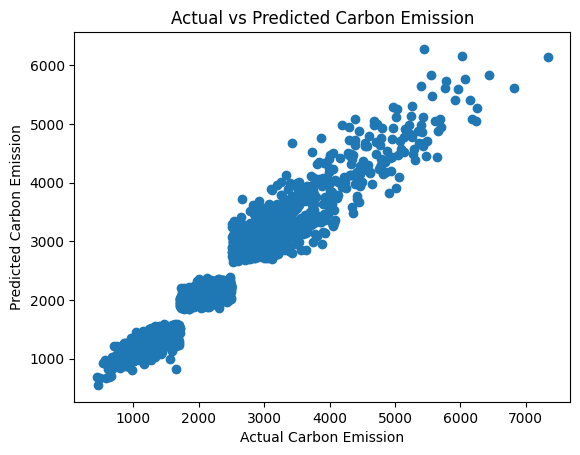

In [266]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Actual vs Predicted Carbon Emission")
plt.show()

# Classification

In [267]:
df["Emission_Class"] = pd.qcut(df["CarbonEmission"], q=3, labels=["Low", "Medium", "High"])
df["Emission_Class"].value_counts()


Emission_Class
Low       3339
High      3334
Medium    3327
Name: count, dtype: int64

In [268]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [269]:
X = df.drop(columns=["CarbonEmission", "Emission_Class"])
y = df["Emission_Class"]

cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include="number").columns.tolist()

preprocessor = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [270]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

clf = Pipeline([
    ("pre", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

clf.fit(X_train, y_train)


,steps,"[('pre', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Accuracy: 0.8065
              precision    recall  f1-score   support

        High       0.85      0.88      0.87       667
         Low       0.82      0.88      0.85       668
      Medium       0.74      0.65      0.69       665

    accuracy                           0.81      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.80      0.81      0.80      2000



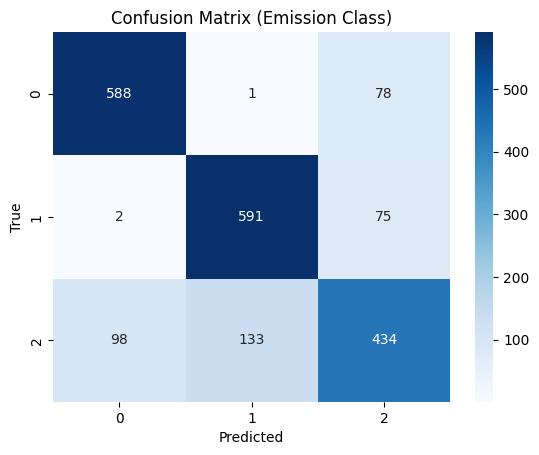

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Emission Class)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
